In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
import numpy as np
import pingouin

In [2]:
raw_data = pd.read_csv("candy-data.csv")
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [3]:
raw_data.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [4]:
raw_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


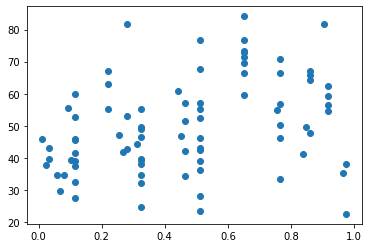

In [5]:
plt.scatter(raw_data["pricepercent"],raw_data["winpercent"])

In [6]:
scipy.stats.pearsonr(raw_data["pricepercent"],raw_data["winpercent"])

(0.34532540996768485, 0.0012088290261781025)

In [7]:
lowess = sm.nonparametric.lowess(raw_data["winpercent"],raw_data["pricepercent"],frac=0.3)
lowess

array([[1.10000000e-02, 3.71186281e+01],
       [2.30000000e-02, 3.76882590e+01],
       [3.40000020e-02, 3.82534557e+01],
       [3.40000020e-02, 3.82534557e+01],
       [5.79999980e-02, 3.96323458e+01],
       [6.89999980e-02, 4.03309113e+01],
       [8.10000000e-02, 4.11461228e+01],
       [9.30000020e-02, 4.20320026e+01],
       [1.04000000e-01, 4.29307860e+01],
       [1.16000000e-01, 4.40475772e+01],
       [1.16000000e-01, 4.40475772e+01],
       [1.16000000e-01, 4.40475772e+01],
       [1.16000000e-01, 4.40475772e+01],
       [1.16000000e-01, 4.40475772e+01],
       [1.16000000e-01, 4.40475772e+01],
       [1.16000000e-01, 4.40475772e+01],
       [1.16000000e-01, 4.40475772e+01],
       [1.16000000e-01, 4.40475772e+01],
       [2.20000000e-01, 6.08239699e+01],
       [2.20000000e-01, 6.08239699e+01],
       [2.20000000e-01, 6.08239699e+01],
       [2.55000000e-01, 5.30844376e+01],
       [2.66999990e-01, 5.09480826e+01],
       [2.79000010e-01, 4.88238631e+01],
       [2.790000

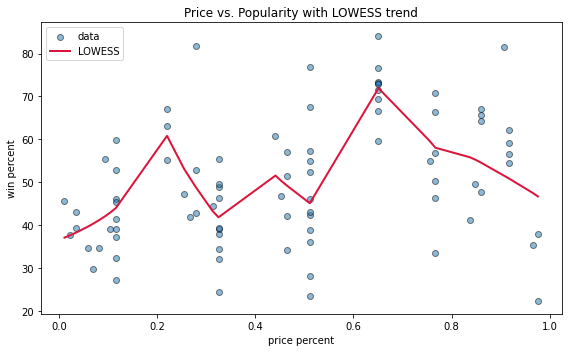

In [8]:
order = np.argsort(lowess[:,0])
x_smooth = lowess[order,0]
y_smooth = lowess[order,1]

fig, ax = plt.subplots(figsize=(8, 5),facecolor="white")
ax.scatter(raw_data["pricepercent"],raw_data["winpercent"],alpha = 0.5, edgecolor = "k", label = "data")

ax.plot(x_smooth,y_smooth,color="crimson",linewidth=2,label="LOWESS")

ax.set_xlabel("price percent")
ax.set_ylabel("win percent")
ax.set_title("Price vs. Popularity with LOWESS trend")
ax.legend()
fig.tight_layout()

Moderate correlation between price and popularity, results are highly significant. Candy around 65% price point seems to be especially popular. This can be used as an indicator for pricing of the new candy type, however the (unknown) candy brand could be an additional factor influencing price and popularity.

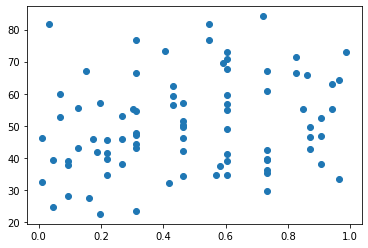

In [21]:
plt.scatter(raw_data["sugarpercent"],raw_data["winpercent"])

In [10]:
scipy.stats.pearsonr(raw_data["sugarpercent"],raw_data["winpercent"])

(0.2291506571280065, 0.03489789676169812)

In [19]:
lowess_sugar = sm.nonparametric.lowess(raw_data["winpercent"],raw_data["sugarpercent"],frac=0.3)
lowess_sugar

array([[1.10000000e-02, 4.18752328e+01],
       [1.10000000e-02, 4.18752328e+01],
       [3.40000020e-02, 4.22302778e+01],
       [4.60000000e-02, 4.23980677e+01],
       [4.60000000e-02, 4.23980677e+01],
       [6.89999980e-02, 4.26814589e+01],
       [6.89999980e-02, 4.26814589e+01],
       [9.30000020e-02, 4.29435582e+01],
       [9.30000020e-02, 4.29435582e+01],
       [9.30000020e-02, 4.29435582e+01],
       [1.27000000e-01, 4.31442231e+01],
       [1.27000000e-01, 4.31442231e+01],
       [1.50999990e-01, 4.28872923e+01],
       [1.62000000e-01, 4.28689926e+01],
       [1.73999990e-01, 4.28423129e+01],
       [1.86000000e-01, 4.28589839e+01],
       [1.97000000e-01, 4.29065133e+01],
       [1.97000000e-01, 4.29065133e+01],
       [2.20000000e-01, 4.36970188e+01],
       [2.20000000e-01, 4.36970188e+01],
       [2.20000000e-01, 4.36970188e+01],
       [2.20000000e-01, 4.36970188e+01],
       [2.66999990e-01, 4.64137860e+01],
       [2.66999990e-01, 4.64137860e+01],
       [2.669999

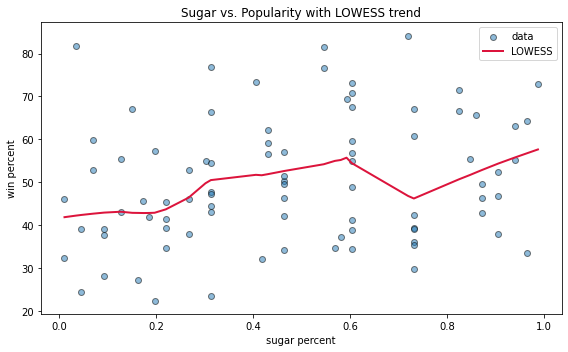

In [20]:
order = np.argsort(lowess_sugar[:,0])
x_smooth = lowess_sugar[order,0]
y_smooth = lowess_sugar[order,1]

fig, ax = plt.subplots(figsize=(8, 5),facecolor="white")
ax.scatter(raw_data["sugarpercent"],raw_data["winpercent"],alpha = 0.5, edgecolor = "k", label = "data")

ax.plot(x_smooth,y_smooth,color="crimson",linewidth=2,label="LOWESS")


ax.set_xlabel("sugar percent")
ax.set_ylabel("win percent")
ax.set_title("Sugar vs. Popularity with LOWESS trend")
ax.legend()
fig.tight_layout()

Low to moderate correlation between sugar content and popularity, results are significant. Higher sugar content apparently does not hurt; no apparent sweet spot for sugar content.

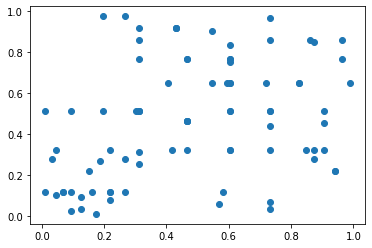

In [11]:
plt.scatter(raw_data["sugarpercent"],raw_data["pricepercent"])

In [12]:
scipy.stats.pearsonr(raw_data["sugarpercent"],raw_data["pricepercent"])

(0.32970638758895476, 0.0020604027524857168)

Moderate correlation between sugar and price, high significance.

In [13]:
metric_vars = raw_data[["pricepercent","sugarpercent","winpercent"]].copy()
metric_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pricepercent  85 non-null     float64
 1   sugarpercent  85 non-null     float64
 2   winpercent    85 non-null     float64
dtypes: float64(3)
memory usage: 2.1 KB


In [17]:
pcorr_price = pingouin.partial_corr(data = metric_vars, x = "pricepercent", y = "winpercent", covar = "sugarpercent", method = "pearson")
pcorr_price

,n,r,CI95%,p-val
pearson,85,0.293563,"[0.08, 0.48]",0.006724


In [18]:
pcorr_sugar = pingouin.partial_corr(data = metric_vars, x = "sugarpercent", y = "winpercent", covar = "pricepercent", method = "pearson")
pcorr_sugar

,n,r,CI95%,p-val
pearson,85,0.130128,"[-0.09, 0.34]",0.238079


Price apparently influences buying choice more than the sugar content (pcorr_sugar significantly lower than non-partial correlation). Initial sugar correlation seems to be confounded by the price.